In [1]:
%pip --quiet install git+https://github.com/mfinzi/equivariant-MLP.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.2/720.2 kB 14.3 MB/s eta 0:00:00


In [2]:
from emlp.reps import V,sparsify_basis,T
from emlp.groups import Z,S,SO,O,O13,SO13,RubiksCube
import jax.numpy as jnp
import numpy as np

In [3]:
!pip install python-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Import scipy
import scipy as sci
#Import matplotlib and associated modules for 3D and animations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [5]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

#Define masses
m1=1.1 #Alpha Centauri A
m2=0.907 #Alpha Centauri B
#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0] #m
#Convert pos vectors to arrays
r1=sci.array(r1,dtype="float64")
r2=sci.array(r2,dtype="float64")

#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] #m/s
#Convert velocity vectors to arrays
v1=sci.array(v1,dtype="float64")
v2=sci.array(v2,dtype="float64")

#Mass of the Third Star
m3=1.0 #Third Star
#Position of the Third Star
r3=[0,1,0] #m
r3=sci.array(r3,dtype="float64")
#Velocity of the Third Star
v3=[0,-0.01,0]
v3=sci.array(v3,dtype="float64")


#Update COM formula
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)
#Update velocity of COM formula
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=sci.linalg.norm(r2-r1)
    r13=sci.linalg.norm(r3-r1)
    r23=sci.linalg.norm(r3-r2)
    
    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3
    r12_derivs=sci.concatenate((dr1bydt,dr2bydt))
    r_derivs=sci.concatenate((r12_derivs,dr3bydt))
    v12_derivs=sci.concatenate((dv1bydt,dv2bydt))
    v_derivs=sci.concatenate((v12_derivs,dv3bydt))
    derivs=sci.concatenate((r_derivs,v_derivs))
    return derivs

<ipython-input-5-79c3c16d3438>:19: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r1=sci.array(r1,dtype="float64")
<ipython-input-5-79c3c16d3438>:20: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r2=sci.array(r2,dtype="float64")
<ipython-input-5-79c3c16d3438>:26: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v1=sci.array(v1,dtype="float64")
<ipython-input-5-79c3c16d3438>:27: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  v2=sci.array(v2,dtype="float64")
<ipython-input-5-79c3c16d3438>:33: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  r3=sci.array(r3,dtype="float64")
<ipython-input-5-79c3c16d3438>:36: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use

In [6]:
#Package initial parameters
init_params=sci.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
time_span=sci.linspace(0,50,2000) #20 orbital periods and 500 points
#Run the ODE solver
import scipy.integrate
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

<ipython-input-6-1b118464923f>:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  init_params=sci.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
<ipython-input-6-1b118464923f>:4: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  time_span=sci.linspace(0,50,2000) #20 orbital periods and 500 points
<ipython-input-5-79c3c16d3438>:61: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r12_derivs=sci.concatenate((dr1bydt,dr2bydt))
<ipython-input-5-79c3c16d3438>:62: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  r_derivs=sci.concatenate((r12_derivs,dr3bydt))
<ipython-input-5-79c3c16d3438>:63: DeprecationWarning: scipy.concatenate is deprecated and will be removed in SciPy 2.0.0, use numpy.concatenate instead
  v12_derivs=sci.conca

In [7]:
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

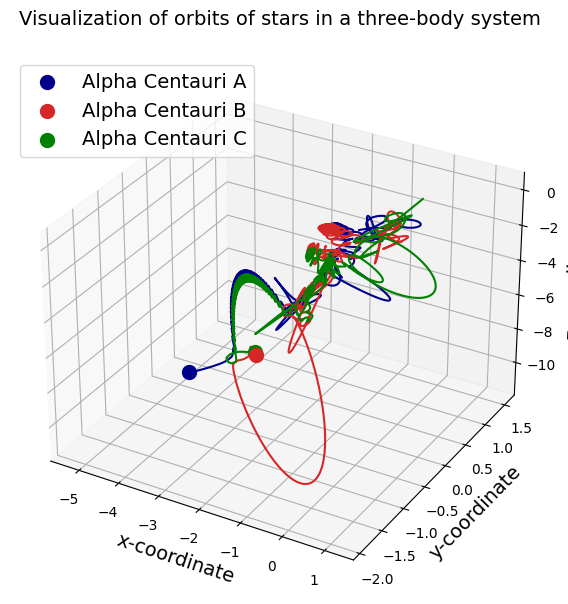

In [29]:
#Create figure
fig=plt.figure(figsize=(7,7))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="green")
#Plot the final positions of the stars
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="green",marker="o",s=100,label="Alpha Centauri C")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a three-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)

In [8]:
# approximating the velocity of each start
import numpy as np
v1_sol = np.zeros(r1_sol.shape)
for i in range(2000):
  if i == 0:
    v1_sol[i] = v1
  else:
    v1_sol[i] = (r1_sol[i]-r1_sol[i-1])/(time_span[i]-time_span[i-1]) #change in position minus change in time

v2_sol = np.zeros(r2_sol.shape)
for i in range(2000):
  if i == 0:
    v2_sol[i] = v2
  else:
    v2_sol[i] = (r2_sol[i]-r2_sol[i-1])/(time_span[i]-time_span[i-1])

v3_sol = np.zeros(r3_sol.shape)
for i in range(2000):
  if i == 0:
    v3_sol[i] = v3
  else:
    v3_sol[i] = (r3_sol[i]-r1_sol[i-1])/(time_span[i]-time_span[i-1])

In [9]:
r1_sol.shape

(2000, 3)

In [10]:
from matplotlib.legend import time

dataset = np.zeros((2000,6,3))
dataset[:,0,:] = three_body_sol[:,:3]
dataset[:,1,:] = three_body_sol[:,3:6]
dataset[:,2,:] = three_body_sol[:,6:9]
dataset[:,3,:] = v1_sol
dataset[:,4,:] = v2_sol
dataset[:,5,:] = v3_sol

datasetx = np.zeros((1999,18))

datasety = np.zeros((1999,18))

#reshaping the data to have all the vectors back to back
for i in range(1999):
  for j in range(18):
    datasetx[i,j] = dataset[i,j//6,j%3] 


for i in range(1999):
  for j in range(18):
    datasety[i,j] = (dataset[i+1,j//6,j%3] - dataset[i,j//6,j%3])/(time_span[i+1]-time_span[i])




In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datasetx, datasety, test_size=0.30, random_state=42)

In [12]:
import emlp
G = O(3) #group O(3)

#rep_in=3*T(0)+6*T(1)
rep_in=6*T(1) #take in 6 vectors
rep_out = 6*T(1) #give back 6 vectors
model = emlp.nn.EMLPH(rep_in,rep_out,group=G,num_layers=3,ch=128)

In [13]:
BS=200
lr=3e-3
NUM_EPOCHS=200

import objax
import jax.numpy as jnp
import numpy as np
from tqdm.auto import tqdm
from torch.utils.data import DataLoader


opt = objax.optimizer.Adam(model.vars())

@objax.Jit
@objax.Function.with_vars(model.vars())
def loss(x, y):
    yhat = model(x)
    return ((yhat-y)**2).mean()

grad_and_val = objax.GradValues(loss, model.vars())

@objax.Jit
@objax.Function.with_vars(model.vars()+opt.vars())
def train_op(x, y, lr):
    g, v = grad_and_val(x, y)
    opt(lr=lr, grads=g)
    return v

trainloader = DataLoader((X_train,y_train),batch_size=BS,shuffle=True)
testloader = DataLoader((X_test,y_test),batch_size=BS,shuffle=True)

In [14]:
test_losses = []
train_losses = []
for epoch in tqdm(range(NUM_EPOCHS)):
    train_losses.append(np.mean([train_op(jnp.array(x),jnp.array(y),lr) for (x,y) in trainloader]))
    if not epoch%10:
        test_losses.append(np.mean([loss(jnp.array(x),jnp.array(y)) for (x,y) in testloader]))

  0%|          | 0/200 [00:00<?, ?it/s]

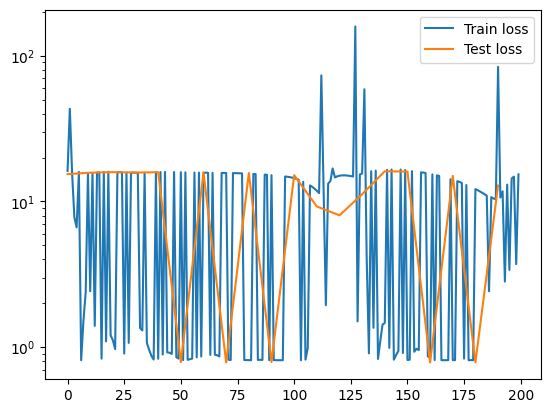

In [15]:
import matplotlib.pyplot as plt
plt.plot(np.arange(NUM_EPOCHS),train_losses,label='Train loss')
plt.plot(np.arange(0,NUM_EPOCHS,10),test_losses,label='Test loss')
plt.legend()
plt.yscale('log')

In [16]:
print("The mean error on the test dataset is ", np.mean(test_losses), "and he standard deviation is", np.std(test_losses))

The mean error on the test dataset is  10.8902 and he standard deviation is 6.24206


In [17]:
model = emlp.nn.MLPH(rep_in,rep_out,group=G,num_layers=3,ch=128)

In [18]:
test_losses = []
train_losses = []
for epoch in tqdm(range(NUM_EPOCHS)):
    train_losses.append(np.mean([train_op(jnp.array(x),jnp.array(y),lr) for (x,y) in trainloader]))
    if not epoch%10:
        test_losses.append(np.mean([loss(jnp.array(x),jnp.array(y)) for (x,y) in testloader]))

  0%|          | 0/200 [00:00<?, ?it/s]

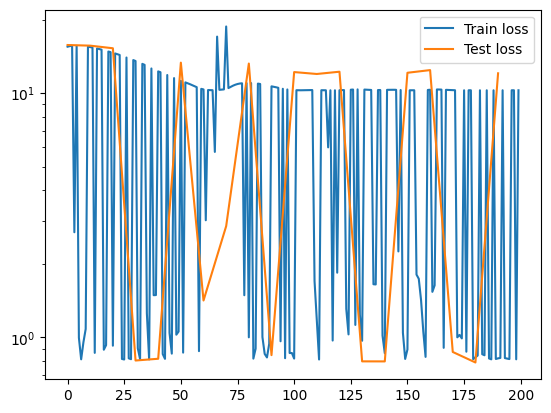

In [19]:
import matplotlib.pyplot as plt
plt.plot(np.arange(NUM_EPOCHS),train_losses,label='Train loss')
plt.plot(np.arange(0,NUM_EPOCHS,10),test_losses,label='Test loss')
plt.legend()
plt.yscale('log')

In [20]:
print("The mean error on the test dataset is ", np.mean(test_losses), "and he standard deviation is", np.std(test_losses))

The mean error on the test dataset is  7.810843 and he standard deviation is 6.1699347


In [21]:
G = O(3)*Z(10)
model = emlp.nn.EMLPH(rep_in,rep_out,group=G,num_layers=3,ch=128)

In [22]:
test_losses = []
train_losses = []
for epoch in tqdm(range(NUM_EPOCHS)):
    train_losses.append(np.mean([train_op(jnp.array(x),jnp.array(y),lr) for (x,y) in trainloader]))
    if not epoch%10:
        test_losses.append(np.mean([loss(jnp.array(x),jnp.array(y)) for (x,y) in testloader]))

  0%|          | 0/200 [00:00<?, ?it/s]

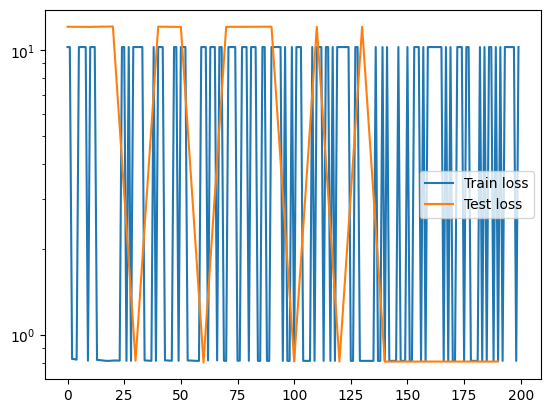

In [23]:
import matplotlib.pyplot as plt
plt.plot(np.arange(NUM_EPOCHS),train_losses,label='Train loss')
plt.plot(np.arange(0,NUM_EPOCHS,10),test_losses,label='Test loss')
plt.legend()
plt.yscale('log')

In [24]:
print("The mean error on the test dataset is ", np.mean(test_losses), "and he standard deviation is", np.std(test_losses))

The mean error on the test dataset is  6.4575295 and he standard deviation is 5.6496177


In [25]:
from emlp.groups import SO2eR3
G = SO2eR3()
model = emlp.nn.EMLPH(rep_in,rep_out,group=G,num_layers=3,ch=128)

In [26]:
test_losses = []
train_losses = []
for epoch in tqdm(range(NUM_EPOCHS)):
    train_losses.append(np.mean([train_op(jnp.array(x),jnp.array(y),lr) for (x,y) in trainloader]))
    if not epoch%10:
        test_losses.append(np.mean([loss(jnp.array(x),jnp.array(y)) for (x,y) in testloader]))

  0%|          | 0/200 [00:00<?, ?it/s]

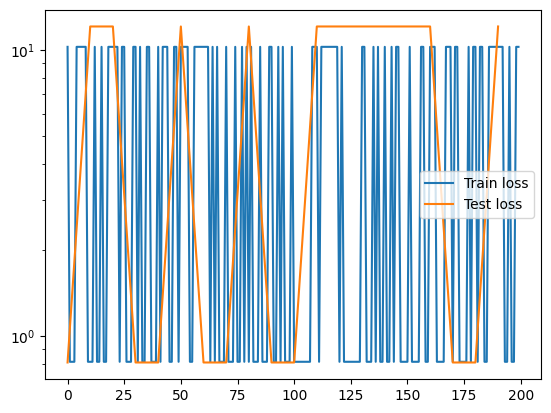

In [27]:
import matplotlib.pyplot as plt
plt.plot(np.arange(NUM_EPOCHS),train_losses,label='Train loss')
plt.plot(np.arange(0,NUM_EPOCHS,10),test_losses,label='Test loss')
plt.legend()
plt.yscale('log')

In [28]:
print("The mean error on the test dataset is ", np.mean(test_losses), "and he standard deviation is", np.std(test_losses))

The mean error on the test dataset is  7.0221314 and he standard deviation is 5.62097
